In [21]:
import sys
import os
import cv2 
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from preprocessing import *
from feature_extraction import *
from skimage.feature import graycomatrix,graycoprops

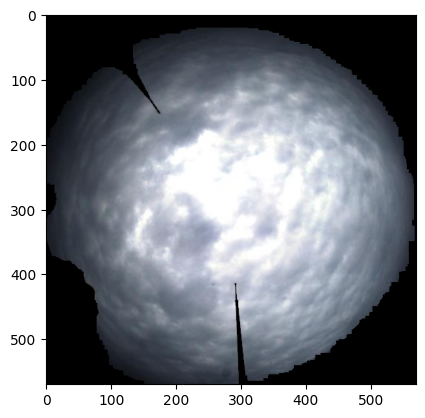

In [22]:
img = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-09\638534922071022037.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\mask_delete_5.png',cv2.IMREAD_GRAYSCALE)
final = cv2.bitwise_and(img,img,mask=mask)
final = preprocessData().crop_center(final,crop_size=570)
plt.imshow(final)

In [23]:
def img2gray(img):
    gray = np.array(0.299*img[:,:,0] + 0.587*final[:,:,1] + 0.114*final[:,:,2])
    gray = gray.astype(np.uint8)
    return gray

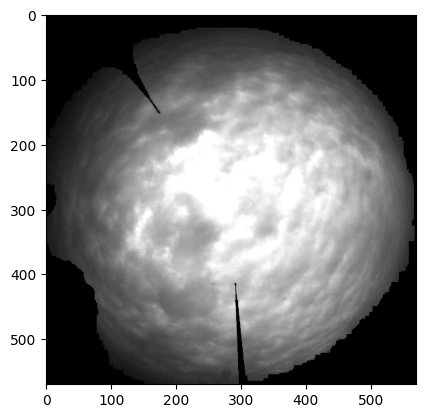

In [24]:
gray = img2gray(final)
plt.imshow(gray,cmap='gray')

In [25]:
GLCM_test = compute_glcm(gray,distances=[2],angles=[0],symmetric=False,normalized=True)
GLCM = preprocessData().computeGlcmsingle(image=gray,distance=[2],angle=[0])

In [26]:
print(GLCM.shape)
print(GLCM_test.shape)

(256, 256, 1, 1)
(256, 256, 1, 1)


In [27]:
props = {'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation'}
test = graycoprops(P=GLCM_test)
real = compute_properties(P=GLCM_test)

In [29]:
stat = statistical(img)